In [1]:
import sys
from ase.io import read, write
from rdkit import Chem

sys.path.insert(0, '../')
from cgf.redecorate import *

Reading coarse-grained xyz file and defining linker molecule:

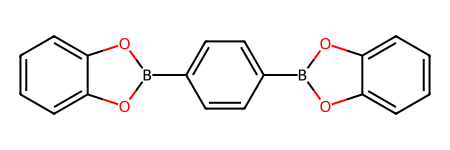

In [2]:
cg_atoms = read('../test-data/TpDB_COF_1phenyl_SW_BNFF.xyz', format='extxyz')

smiles = 'B1(OC2=CC=CC=C2O1)C3=CC=C(C=C3)B4OC5=CC=CC=C5O4'
mol = Chem.MolFromSmiles(smiles)
mol


In [3]:
linker_atoms = mol2Atoms(mol, '3D')
left_ind, right_ind = get_left_right(linker_atoms, 2, ignoreHs=False)
del linker_atoms[left_ind + right_ind] # simply remove right/leftmost atoms

Redecorating COF with the defined linker based on the coarse-grained positions and rotations:

In [4]:
r0 = 30.082740/np.sqrt(3)  # approximate distance between cg-cores

redecorated_COF = redecorate(cg_atoms, linker_atoms, r0)

In [5]:
redecorated_COF

Atoms(symbols='C486H216B54O108', pbc=True, cell=[[90.2481003, 0.0, 0.0], [-45.1240501, 78.1571503, 0.0], [0.0, 0.0, 30.0]])

In [6]:
#redecorated_COF.write('redecorated_COF.cif')